# %rest usage example

## Load

In [1]:
%load_ext restmagic

##  Line magic

Arguments of the command are HTTP method and URL.

In [2]:
result = %rest GET https://httpbin.org/json

{
  "slideshow": {
    "author": "Yours Truly",
    "date": "date of publication",
    "slides": [
      {
        "title": "Wake up to WonderWidgets!",
        "type": "all"
      },
      {
        "items": [
          "Why <em>WonderWidgets</em> are great",
          "Who <em>buys</em> WonderWidgets"
        ],
        "title": "Overview",
        "type": "all"
      }
    ],
    "title": "Sample Slide Show"
  }
}

The comand output is a `Response` object of the `requests` library.

In [3]:
type(result)

requests.models.Response

In [4]:
result.json()['slideshow']['title']

'Sample Slide Show'

## Display options

    --verbose, -v  Dump full HTTP session log.
    --quiet, -q     Do not print HTTP request and response.


In [5]:
%rest -q GET https://httpbin.org/json

<Response [200]>

In [6]:
%rest -v GET https://httpbin.org/json

< GET /json HTTP/1.1
< Host: httpbin.org
< User-Agent: python-requests/2.24.0
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< 

> HTTP/1.1 200 OK
> Date: Sun, 16 May 2021 17:37:37 GMT
> Content-Type: application/json
> Content-Length: 429
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> 
{
  "slideshow": {
    "author": "Yours Truly", 
    "date": "date of publication", 
    "slides": [
      {
        "title": "Wake up to WonderWidgets!", 
        "type": "all"
      }, 
      {
        "items": [
          "Why <em>WonderWidgets</em> are great", 
          "Who <em>buys</em> WonderWidgets"
        ], 
        "title": "Overview", 
        "type": "all"
      }
    ], 
    "title": "Sample Slide Show"
  }
}



<Response [200]>

## Short form

Method and scheme could be omitted, `GET` and `https://` will be used in this case.

In [7]:
%rest -q httpbin.org/json

<Response [200]>

## Cell magic
Input of the cell magic mimics the HTTP message format:
* `request line`
* `headers`
* `empty line`
* `message body`

Headers and message body are optional.


In [8]:
%%rest POST https://httpbin.org/post
Content-Type: application/x-www-form-urlencoded

username=Gena&email=crocodile@example.org

{
  "args": {},
  "data": "",
  "files": {},
  "form": {
    "email": "crocodile@example.org",
    "username": "Gena"
  },
  "headers": {
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate",
    "Content-Length": "41",
    "Content-Type": "application/x-www-form-urlencoded",
    "Host": "httpbin.org",
    "User-Agent": "python-requests/2.24.0",
    "X-Amzn-Trace-Id": "Root=1-60a15862-313476cc41582e4566104bdb"
  },
  "json": null,
  "origin": "79.143.111.251",
  "url": "https://httpbin.org/post"
}

<Response [200]>

In [9]:
%%rest -v GET https://httpbin.org/user-agent
User-Agent: Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2

< GET /user-agent HTTP/1.1
< Host: httpbin.org
< User-Agent: Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< 

> HTTP/1.1 200 OK
> Date: Sun, 16 May 2021 17:37:39 GMT
> Content-Type: application/json
> Content-Length: 95
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> 
{
  "user-agent": "Mozilla/51.0.2 (X11; Unix x86_64; rv:29.0) Gecko/20170101 Firefox/51.0.2"
}



<Response [200]>

### As with all commands, ouput(`Response` object) is available in `_` variable.

In [10]:
%%rest -q POST https://httpbin.org/post
Content-Type: multipart/form-data;boundary="myboundary"

--myboundary 
Content-Disposition: form-data; name="x"

value1
--myboundary 
Content-Disposition: form-data; name="y"

value2
--myboundary
Content-Disposition: form-data; name="file"; filename="test.txt"
Content-Type: application/octet-stream

Here is a file content.
--myboundary--

<Response [200]>

In [11]:
print(_.json()['files'])
print(_.json()['form'])

{'file': 'Here is a file content.'}
{'x': 'value1', 'y': 'value2'}


## Variables

Template strings `$`-based substitutions are supported.

( https://docs.python.org/3/library/string.html#template-strings )

In [12]:
httpbin='https://httpbin.org'
value = 'TEST'

In [13]:
%%rest POST $httpbin/post
Content-Type: application/json
Cookie: a=${value}1;b=${value}2

{
    "array here": [
        "$value",
        "$$ escaped: $$value"
    ]
}

{
  "args": {},
  "data": "{\n    \"array here\": [\n        \"TEST\",\n        \"$ escaped: $value\"\n    ]\n}",
  "files": {},
  "form": {},
  "headers": {
    "Accept": "*/*",
    "Accept-Encoding": "gzip, deflate",
    "Content-Length": "73",
    "Content-Type": "application/json",
    "Cookie": "a=TEST1;b=TEST2",
    "Host": "httpbin.org",
    "User-Agent": "python-requests/2.24.0",
    "X-Amzn-Trace-Id": "Root=1-60a15865-282065d22ee8ae787d7a84ef"
  },
  "json": {
    "array here": [
      "TEST",
      "$ escaped: $value"
    ]
  },
  "origin": "79.143.111.251",
  "url": "https://httpbin.org/post"
}

<Response [200]>

One restriction, is that `${}` form could not be used in a first line of a query.

This will work: `%rest -q $httpbin/get`,

but this not: `%rest -q ${httpbin}/get`


## Connection options

### --proxy
    --proxy PROXY         Sets the proxy server to use for HTTP and HTTPS.

In [14]:
%rest --proxy http://example.org:9001 httpbin.org

Request was not completed.


ProxyError: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: / (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7fca60e08ee0>: Failed to establish a new connection: [Errno 111] Connection refused')))

### --max-redirects
    --max-redirects MAX_REDIRECTS
                        Set the maximum number of redirects allowed, 30 by default.

In [15]:
%rest -v --max-redirects 0 https://httpbingo.org/redirect/1

Request was not completed.


TooManyRedirects: Exceeded 0 redirects.

### --timeout
    --timeout TIMEOUT     Set the maximum number of seconds to wait for a response, 10 by default.

In [16]:
%rest --timeout 0.1 https://httpbin.org/delay/1

Request was not completed.


ConnectTimeout: HTTPSConnectionPool(host='httpbin.org', port=443): Max retries exceeded with url: /delay/1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7fca60e15e20>, 'Connection to httpbin.org timed out. (connect timeout=0.1)'))

### --insecure

    --insecure, -k        Disable SSL certificate verification.


In [17]:
%rest -q https://self-signed.badssl.com/

Use `%rest --insecure` option to disable SSL certificate verification.


SSLError: HTTPSConnectionPool(host='self-signed.badssl.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1108)')))

In [18]:
%rest -q --insecure https://self-signed.badssl.com/

<Response [200]>

### --cacert

    --cacert CACERT       Path to a file to use as a SSL certificate to verify the peer.


In [19]:
%rest -q --cacert badssl-server.pem https://self-signed.badssl.com/

<Response [200]>

### --cert and --key : specify a client side SSL certificate

    --cert CERT           Path to a file to use as a client side SSL certificate.
    --key KEY             Path to a file to use as a client side SSL private key.


In [20]:
%rest -q https://client.badssl.com/

<Response [400]>

In [21]:
%rest -q --cert badssl.crt --key badssl.key https://client.badssl.com/

<Response [200]>

## Default values
`%rest_root` allows to set values to be used by all subsequent requests:
default HTTP method, first part of an URL, headers and connection options.

The syntax is same as for `%rest`.

In [22]:
%%rest_root --verbose httpbin.org
Authorization: Bearer abcde
User-Agent: restmagic-test

Requests defaults are set.


In [23]:
%rest /bearer

< GET /bearer HTTP/1.1
< Host: httpbin.org
< User-Agent: restmagic-test
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< Authorization: Bearer abcde
< 

> HTTP/1.1 200 OK
> Date: Sun, 16 May 2021 17:37:46 GMT
> Content-Type: application/json
> Content-Length: 49
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> 
{
  "authenticated": true, 
  "token": "abcde"
}



<Response [200]>

When called without arguments, `%rest_root` clears default values.

In [24]:
%rest_root

Requests defaults are canceled.


In [25]:
%rest_root httpbin.org

Requests defaults are set.


## Sessions

By default, new session is created for every `%rest` request.

`%rest_session` allows to start a persistent session, to be used by all subsequent requests.

In [26]:
%rest_session

New session started.


In [27]:
%rest -q /cookies/set/test/value

<Response [200]>

In [28]:
%rest -v /cookies

< GET /cookies HTTP/1.1
< Host: httpbin.org
< User-Agent: python-requests/2.24.0
< Accept-Encoding: gzip, deflate
< Accept: */*
< Connection: keep-alive
< Cookie: test=value
< 

> HTTP/1.1 200 OK
> Date: Sun, 16 May 2021 17:37:47 GMT
> Content-Type: application/json
> Content-Length: 43
> Connection: keep-alive
> Server: gunicorn/19.9.0
> Access-Control-Allow-Origin: *
> Access-Control-Allow-Credentials: true
> 
{
  "cookies": {
    "test": "value"
  }
}



<Response [200]>

`%rest-session` options:
    
    --end, -e  End the current the session, and do not start a new one.


In [29]:
%rest_session -e

Session ended.


## Display part of response

    --extract expression, -e expression  Extract parts of a response content with the given
                                         Xpath/JSONPath expression.

### JSON
Parts of a JSON response could be selectively extracted using a JSONPath expression ( https://goessner.net/articles/JsonPath/index.html ).

`$` (root object) at the beginning could be omitted.

Display only specific item:

In [30]:
%rest -e slideshow.slides.[1].items.[0] /json

{
  "slideshow.slides.[1].items.[0]": "Why <em>WonderWidgets</em> are great"
}

<Response [200]>

Display `title` fields of all objects:

In [31]:
%rest -e ..title /json

{
  "slideshow.title": "Sample Slide Show",
  "slideshow.slides.[0].title": "Wake up to WonderWidgets!",
  "slideshow.slides.[1].title": "Overview"
}

<Response [200]>

### XML and HTML
Parts of a XML and HTML responses could be selectively extracted using a Xpath expression.

Text of all "title" elements:

In [32]:
%rest -e //title/text() /xml

{
  "/slideshow/slide[1]/title": "Wake up to WonderWidgets!",
  "/slideshow/slide[2]/title": "Overview"
}

<Response [200]>

Number of "item" objects:

In [33]:
%rest -e count(//item) /xml

{
  "count(//item)": 3.0
}

<Response [200]>

Parsing HTML response:

In [34]:
%rest -e '//ul[@class="list-news"]//h2//a/text()' https://www.djangoproject.com/weblog/

{
  "/html/body/div[4]/div[1]/ul/li[1]/h2/a": "Django 4.x Technical Board Election Results",
  "/html/body/div[4]/div[1]/ul/li[2]/h2/a": "Django bugfix releases issued: 3.2.3, 3.1.11, and 2.2.23",
  "/html/body/div[4]/div[1]/ul/li[3]/h2/a": "Django security releases issued: 3.2.2, 3.1.10, and 2.2.22",
  "/html/body/div[4]/div[1]/ul/li[4]/h2/a": "PyCharm & DSF Campaign 2021 Results",
  "/html/body/div[4]/div[1]/ul/li[5]/h2/a": "Django security releases issued: 3.2.1, 3.1.9, and 2.2.21",
  "/html/body/div[4]/div[1]/ul/li[6]/h2/a": "Technical Board Candidate Registration",
  "/html/body/div[4]/div[1]/ul/li[7]/h2/a": "Django Debug Toolbar security releases issued: 3.2.1, 2.2.1 and 1.11.1.",
  "/html/body/div[4]/div[1]/ul/li[8]/h2/a": "Announcement of 4.x Technical Board Election Registration",
  "/html/body/div[4]/div[1]/ul/li[9]/h2/a": "Django 3.2 released",
  "/html/body/div[4]/div[1]/ul/li[10]/h2/a": "Django security releases issued: 3.1.8, 3.0.14, and 2.2.20"
}

<Response [200]>

### -- parser
    --parser <{json,xml,html}>
                        Set which parser to use to extract parts of a response content.

Parser could be explicitly specified. By default, parser is detected from the `Content-Type` header of the response.



In [35]:
%%rest --parser xml -e "/*[name() = 'svg']//*[name() = 'g']/@*[name() = 'id']" /image
Accept: image/svg+xml

{
  "/*/*[2]/*[4]": "circles",
  "/*/*[2]/*[5]": "stars",
  "/*/*[2]/*[6]": "svg-textbox",
  "/*/*[2]/*[6]/*[3]": "svg-text"
}

<Response [200]>

##  Pretty display

Beware, `%rest` tries to display response in a most pretty way. Very insecure behavior.

In [36]:
%rest /html

<Response [200]>

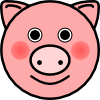

<Response [200]>

In [37]:
%%rest /image
Accept: image/png